In [1]:
from preporcess import CleanerAnny
from __init__ import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

Using cmappertools v1.0.24.


In [2]:
def dfBuilder(kw):
    cleaner = CleanerAnny(confUser, kw)
    dfs = cleaner._getDfs(p=0)
    dfFull = pd.concat(dfs, axis =0)
    #dfFull.drop_duplicates(subset=['核心客户号'], inplace=True)
    #print(kw)
    print('Shape:', dfFull.dropna().shape)
    #print('Columns:', dfFull.columns)
    #print(dfFull.isnull().sum())
    return dfFull

In [3]:
%%capture
dfasset = dfBuilder(['金融资产'])
# cleannerAnny = CleanerAnny(confUser, ['金融资产'])
# dftarget = cleannerAnny.startCleaning(intresedCode= [107, 130, 170])
# dftarget.set_index('核心客户号', drop=True, inplace= True)
# dfuinfo['核心客户号'] = dfuinfo['核心客户号'].apply(intIndex)
# dfuinfo.dropna(inplace=True)
# dfuinfo.set_index('核心客户号', drop=True, inplace= True)
# #dfuinfo = dfuinfo.loc[indexTypeReformat(dfuinfo.index)]
# print(dftarget.shape, dfuinfo.shape)
# masterDf = dfuinfo.join(dftarget)
# masterDf.dropna(inplace=True)

In [4]:
dfasset.shape

(69481, 6)

In [5]:
dfasset.head()

,核心客户号,金融资产余额,金融资产代码,金融资产余额季日均,金融资产余额年日均,金融资产描述
0,1350484044,304790.14,120,303225.62,303225.62,理财
1,1520136930,100000.00,102,148655.50,148655.50,定期存款
2,1516344269,274291.71,114,276118.94,276118.94,消费贷款
3,1515478496,6012.30,130,28994.67,28994.67,基金
4,1522964374,130000.00,142,130000.00,130000.00,电子式储蓄国债


### 建立金融资产代码的频率表 

In [6]:
codeFdf = {'code':[], 'count':[], 'description':[], 'percent':[]}
for code, df in dfasset.groupby(['金融资产代码']):
    codeFdf['code'].append(code)
    codeFdf['count'].append(df.shape[0])
    codeFdf['description'].append(df['金融资产描述'])
    codeFdf['percent'].append("{:.2f}%".format(100*df.shape[0]/dfasset.shape[0]))
codeFdf = pd.DataFrame(codeFdf)
codeFdf.sort_values(by='count', ascending=False, inplace=True)

In [7]:
codeFdf

,code,count,description,percent
0,100,13100,24 储蓄存款 48 储蓄存款 70 储蓄存款 92 ...,18.85%
1,101,12767,11 活期存款 36 活期存款 59 活期存款 81 ...,18.37%
2,102,8772,1 定期存款 26 定期存款 50 定期存款 72 ...,12.63%
3,103,6076,20 钱生钱 44 钱生钱 66 钱生钱 88 钱生...,8.74%
12,120,4933,0 理财 25 理财 49 理财 71 理财 93...,7.10%
13,121,4900,7 TSS 32 TSS 55 TSS 77 TS...,7.05%
16,131,3284,21 一般基金 45 一般基金 67 一般基金 89 ...,4.73%
15,130,3284,3 基金 28 基金 52 基金 74 基金 96...,4.73%
6,107,2669,14 主动型负债 39 主动型负债 62 主动型负债 84 ...,3.84%
28,1072,2633,8501 保本理财 8508 保本理财 8515 保本理财 8522 ...,3.79%


In [8]:
dfasset['金融资产代码'] = dfasset['金融资产代码'].astype('category')

In [9]:
s = dfasset['金融资产代码']

In [10]:
dfassetDummy = pd.get_dummies(dfasset, columns=['金融资产代码'])

In [11]:
dfassetDummy.columns

Index(['核心客户号', '金融资产余额', '金融资产余额季日均', '金融资产余额年日均', '金融资产描述', '金融资产代码_100',
       '金融资产代码_101', '金融资产代码_102', '金融资产代码_103', '金融资产代码_104', '金融资产代码_105',
       '金融资产代码_107', '金融资产代码_110', '金融资产代码_111', '金融资产代码_112', '金融资产代码_113',
       '金融资产代码_114', '金融资产代码_120', '金融资产代码_121', '金融资产代码_122', '金融资产代码_130',
       '金融资产代码_131', '金融资产代码_140', '金融资产代码_142', '金融资产代码_143', '金融资产代码_150',
       '金融资产代码_160', '金融资产代码_161', '金融资产代码_170', '金融资产代码_190', '金融资产代码_201',
       '金融资产代码_202', '金融资产代码_1071', '金融资产代码_1072', '金融资产代码_1211',
       '金融资产代码_1221'],
      dtype='object')

### 查看购买107，130，170产品的这些用户群，购买其他产品的情况，与未购买的用户群购买成分对比 

In [12]:
dummyCols= ['金融资产代码_100',
       '金融资产代码_101', '金融资产代码_102', '金融资产代码_103', '金融资产代码_104', '金融资产代码_105',
       '金融资产代码_107', '金融资产代码_110', '金融资产代码_111', '金融资产代码_112', '金融资产代码_113',
       '金融资产代码_114', '金融资产代码_120', '金融资产代码_121', '金融资产代码_122', '金融资产代码_130',
       '金融资产代码_131', '金融资产代码_140', '金融资产代码_142', '金融资产代码_143', '金融资产代码_150',
       '金融资产代码_160', '金融资产代码_161', '金融资产代码_170', '金融资产代码_190', '金融资产代码_201',
       '金融资产代码_202', '金融资产代码_1071', '金融资产代码_1072', '金融资产代码_1211',
       '金融资产代码_1221']

In [13]:
crossDf = {}
for col in [107, 130, 170]:
    posUids = dfasset.ix[dfasset['金融资产代码']== col, '核心客户号'].values
    
    posDf = dfassetDummy.ix[dfasset['核心客户号'].isin(posUids), dummyCols]
    negDf = dfassetDummy.ix[~dfasset['核心客户号'].isin(posUids), dummyCols]
    crossDf['正'+str(col)] = posDf.sum(axis=0)/posDf.shape[0]
    crossDf['负'+str(col)] = negDf.sum(axis=0)/negDf.shape[0]
crossDf = pd.DataFrame(crossDf)   

In [14]:
# crossDf['dif107'] = (crossDf['正107'] - crossDf['负107'])/crossDf['正107'] 
# crossDf['dif170'] = (crossDf['正170'] - crossDf['负170'])/crossDf['正170'] 
# crossDf['dif130'] = (crossDf['正130'] - crossDf['负130'])/crossDf['正130']
crossDf['ratio107'] = abs((crossDf['正107']/crossDf['负107']) -1) 
crossDf['ratio170'] = abs((crossDf['正170']/crossDf['负170']) -1)
crossDf['ratio130'] = abs((crossDf['正130']/crossDf['负130']) -1)

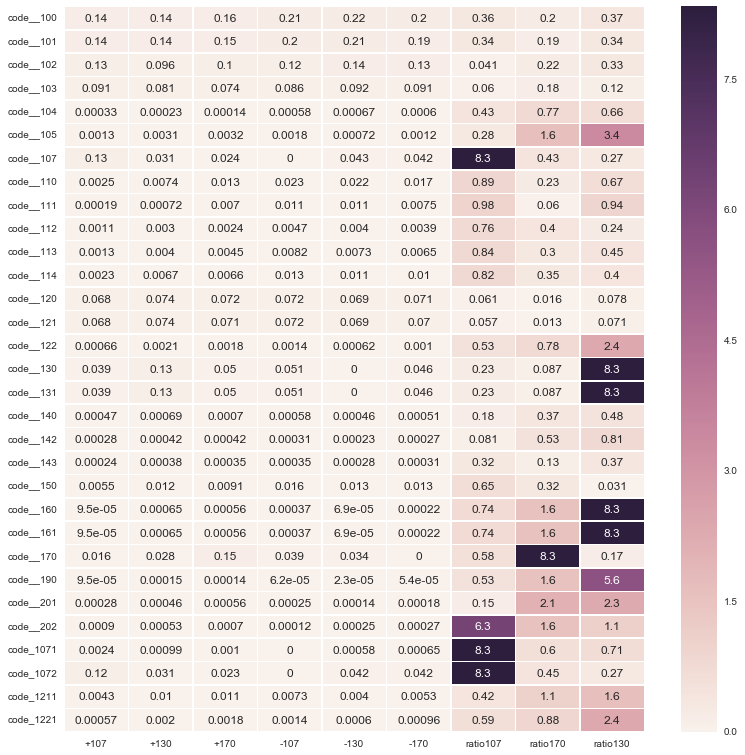

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
sns.set()

def indexRename(inx):
    renamedic= {}
    for n in inx:
        renamedic[n] = 'code_'+n[-4:]
    return renamedic


crossDf = crossDf.rename(index=indexRename(crossDf.index.values), columns={'正107': '+107', '负107': '-107',
                                                                            '正170': '+170', '负170': '-170',
                                                                            '正130': '+130', '负130': '-130'})

crossDf.replace(np.inf, np.nan, inplace=True)
maxV = crossDf.max().max()
crossDf.replace(np.nan, maxV, inplace=True)

# scale for visual purpose
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# crossDf_scaled = pd.DataFrame(scaler.fit_transform(crossDf), columns=crossDf.columns, index=crossDf.index)

plt.figure(figsize=(13,13))
# sns.heatmap(crossDf[['ratio107', 'ratio170', 'ratio130']], annot=True,  linewidths=.5)
sns.heatmap(crossDf, annot=True,  linewidths=.5)

* 横轴产品在纵轴产品的用户占比
* 最右边三个dif是正负样本的比例（shifted by 1）。越小越没有分离度，数值很大的要考虑是不是因为基数很小（variance 相对就很大, 
* 右边三个columns里面，row都小于0.1的，可以忽略。。

In [16]:
dfasset.ix[dfasset['金融资产代码']==1072, '金融资产描述' ].drop_duplicates()

8501    保本理财
Name: 金融资产描述, dtype: object

In [17]:
import scipy.spatial.distance as pdist

In [18]:
from sklearn.metrics import pairwise_distances

In [19]:
dist_out = 1-pairwise_distances(crossDf.T.values)#, metric="ec")
dist_out = pd.DataFrame(dist_out, index=crossDf.columns, columns=crossDf.columns)

In [20]:
dist_out

,+107,+130,+170,-107,-130,-170,ratio107,ratio170,ratio130
+107,1.000000,0.814577,0.794200,0.790993,0.824942,0.852893,-14.846425,-8.517306,-17.539501
+130,0.814577,1.000000,0.832843,0.845250,0.785158,0.854385,-14.942305,-8.512522,-17.462862
+170,0.794200,0.832843,1.000000,0.855874,0.828139,0.830456,-14.946628,-8.402876,-17.528326
-107,0.790993,0.845250,0.855874,1.000000,0.903287,0.925218,-14.972938,-8.505508,-17.528108
-130,0.824942,0.785158,0.828139,0.903287,1.000000,0.919131,-14.930139,-8.507140,-17.573184
-170,0.852893,0.854385,0.830456,0.925218,0.919131,1.000000,-14.931389,-8.536281,-17.532253
ratio107,-14.846425,-14.942305,-14.946628,-14.972938,-14.930139,-14.931389,1.000000,-15.682602,-21.627578
ratio170,-8.517306,-8.512522,-8.402876,-8.505508,-8.507140,-8.536281,-15.682602,1.000000,-16.918199
ratio130,-17.539501,-17.462862,-17.528326,-17.528108,-17.573184,-17.532253,-21.627578,-16.918199,1.000000
